### Bhagyashree Deshpande

# Output variable -> y
# y -> Whether the client has subscribed a term deposit or not
# Binomial ("yes" or "no")

## Import Necessary Libraries

In [27]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
data = pd.read_csv('bank-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Understanding

In [3]:
data.shape

(45211, 17)

In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Data Preparation

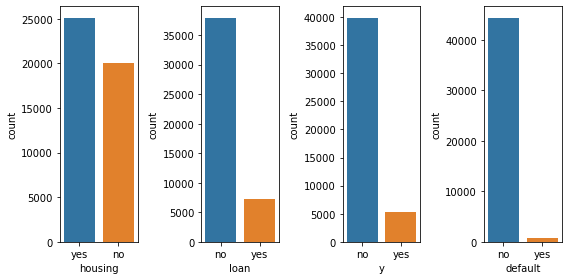

In [8]:
fig,ax = plt.subplots(1,4)
sns.countplot(x = 'housing', data = data, ax = ax[0])
sns.countplot(x = 'loan', data = data, ax = ax[1])
sns.countplot(x = 'y', data = data, ax = ax[2])
sns.countplot(x = 'default', data = data, ax = ax[3])
fig.set_size_inches(8,4)
plt.tight_layout()
fig.show()

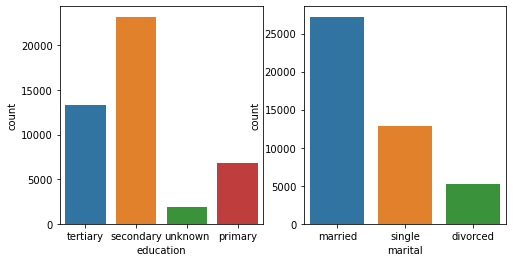

<Figure size 432x216 with 0 Axes>

In [9]:
fig, ax = plt.subplots(1,2)
plt.figure(figsize = (6,3))
sns.countplot(x = 'education', data = data, ax = ax[0])
sns.countplot(x = 'marital', data = data, ax = ax[1])
fig.set_size_inches(8,4)
plt.tight_layout()
fig.show()

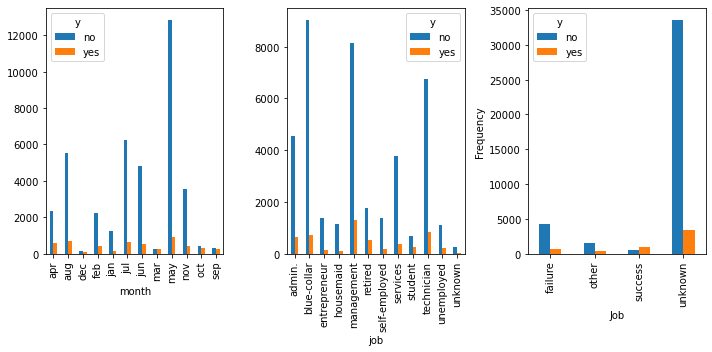

In [10]:
fig, ax = plt.subplots(1,3)
pd.crosstab(data.month,data.y).plot(kind='bar', ax = ax[0])
pd.crosstab(data.job,data.y).plot(kind='bar', ax = ax[1])
pd.crosstab(data.poutcome,data.y).plot(kind='bar', ax = ax[2])
plt.xlabel('Job')
plt.ylabel('Frequency')
fig.set_size_inches(10,5)
plt.tight_layout()

In [11]:
data.drop(['month', 'education', 'pdays', 'day', 'campaign', 'age', 'loan', 'housing', 'marital'], axis = 1, inplace = True)
data.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


In [12]:
contactd = pd.get_dummies(data['contact'], drop_first = True)
jobd = pd.get_dummies(data['job'], drop_first = True)
poutcomed = pd.get_dummies(data['poutcome'], drop_first = True)
defaultd = pd.get_dummies(data['default'], drop_first = True)

In [13]:
data = pd.concat([data, defaultd, poutcomed, jobd, contactd], axis = 1)
data.head()

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,0,0,0,0,1,0,1


In [14]:
data.drop(['default','poutcome','job','contact'], axis = 1, inplace = True)
data.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [15]:
data_new = data.copy()
data_new['y'] = data_new['y'].map({'no' : 0, 'yes' : 1})
data_new

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
X = data.drop('y', axis = 1)
y = data['y']

In [17]:
classifier = LogisticRegression()
classifier.fit(X,y)

LogisticRegression()

In [18]:
y_pred = classifier.predict(X)
y_pred_prob = classifier.predict_proba(X)
y_pred_prob

array([[0.97641844, 0.02358156],
       [0.98507817, 0.01492183],
       [0.99002787, 0.00997213],
       ...,
       [0.00853499, 0.99146501],
       [0.8822751 , 0.1177249 ],
       [0.87910147, 0.12089853]])

In [25]:
confusion_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print(confusion_matrix,'\n', accuracy)

[[39005   917]
 [ 3605  1684]] 
 0.8999800933401163


In [26]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



## ROC Curve

In [28]:
label_encoder = preprocessing.LabelEncoder()
y_predict = label_encoder.fit_transform(y_pred)
y_actual = label_encoder.fit_transform(data_new['y'])

In [29]:
fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(y_actual, y_predict)

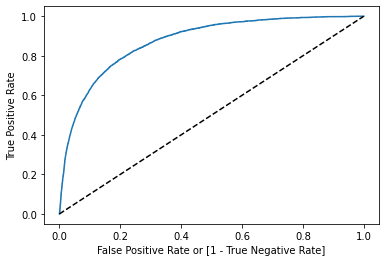

In [31]:
plt.plot(fpr, tpr, label = 'logistic model (area = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [32]:
auc

0.6477134406230929

### Insights drawn

From the ROC curve, we observe that, the area under curve is 64.77%. It is used to predict the true positive rate. 
The created model gives 89.99% accurate prediction for the client to subscribe the term deposit.